# Morphology Tutorial

Morphology sub-package functions can be used with a clean mask of a plant (see VIS tutorial for examples of masking background. This tutorial will start with a binary mask (after object segmentation has been completed) but in a complete workflow users will need to use other functions to achieve plant isolation. Skeletonizing is very sensitive to any pepper noise remaining within a binary mask. Morphology functions are intended to be one type of object analysis. These functions can potentially return information about leaf length, leaf angle, and leaf curvature.

In [1]:
# Import libraries
from plantcv import plantcv as pcv 
import pandas as pd


In [2]:
class options:
    def __init__(self):
        self.image = "plantula.png" # o puede ser "./plantula.png" 
        self.debug = "plot" #grafique
        self.writeimg= True #escriba los resultados
        self.result = "morphology_results.txt"
        self.outdir = "./"

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug



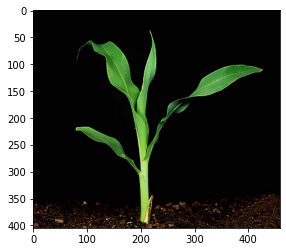

In [3]:
# Read image (sometimes you need to run this line twice to see the image) 


# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)


# Create masked image from a color image based RGB color-space and threshold values. 
# for lower and upper_thresh list as: thresh = [red_thresh, green_thresh, blue_thresh]

#mask, masked_img = pcv.threshold.custom_range(img=img, lower_thresh=[5,5,5], upper_thresh=[230,230,230], channel='RGB')


# Create masked image from a color image based HSV color-space and threshold values. 
# for lower and upper_thresh list as: thresh = [hue_thresh, saturation_thresh, value_thresh]

#mask, masked_img = pcv.threshold.custom_range(img=img, lower_thresh=[30,65,20], upper_thresh=[70,255,220], channel='HSV')


# Create masked image from a color image based LAB color-space and threshold values.
# for lower and upper_thresh list as: thresh = [L_thresh, A_thresh, B_thresh]
#mask, masked_img = pcv.threshold.custom_range(img=img, lower_thresh=[0,0,158], upper_thresh=[255,255,255], channel='LAB')


# Create masked image based grayscale color-space and threshold values. 
# Note that a grayscale image is used. pcv.threshold.custom_range works with both RGB and gray input images. 
#mask, masked_img = pcv.threshold.custom_range(img=gray_img, lower_thresh=[39], upper_thresh=[100], channel='gray')




# Crop the mask 
#cropped_mask = mask[220:600, 100:510]



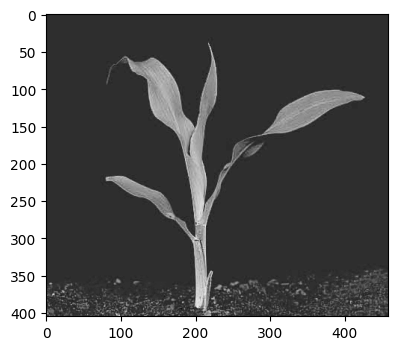

In [4]:
# Convert RGB to HSV and extract the saturation channel

# Inputs:
#   rgb_image - RGB image data 
#   channel - Split by 'h' (hue), 's' (saturation), or 'v' (value) channel
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

In [8]:
# Crop the mask 
cropped_b = b[0:340,:]


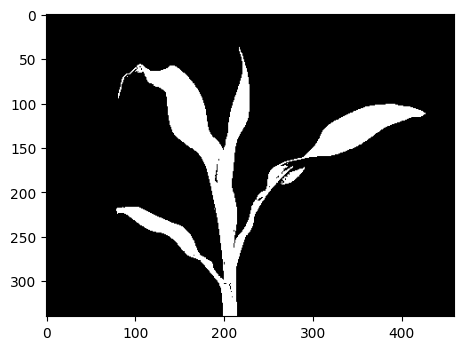

In [6]:
# Threshold the blue channel image 
b_thresh = pcv.threshold.binary(gray_img=cropped_b, threshold=135, max_value=255, 
                                object_type='light')

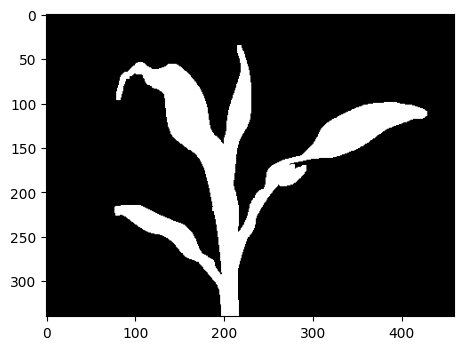

In [20]:
#Aplicación de la dilación con un elemento estructurante de 5 x 5 para aumetar el tamaño
# de los objetos. Puede ser usado para eliminar pequeños orificios en la imagen

imgdilation=pcv.dilate(gray_img=b_thresh, ksize=5, i=1)

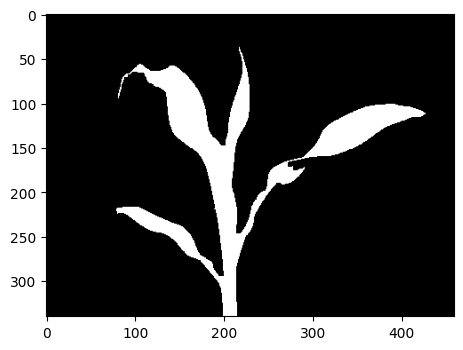

In [21]:
#Aplicación de erosión con un elemento estructurante de 5 x 5 para reducir el tamaño 
#de los objetos y eliminar objetos en la imagen de tamaño pequeño. 

imgerosion=pcv.erode(gray_img=imgdilation, ksize=5, i=1)

<IPython.core.display.Javascript object>


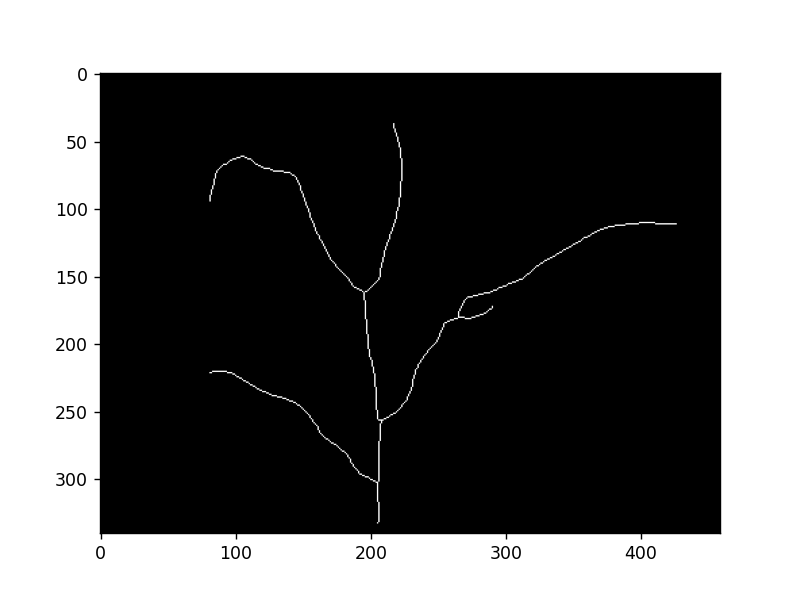

In [22]:
# Skeletonize the mask 
%matplotlib notebook


# Apply fill holes to a binary image 

#fill_image = pcv.fill_holes(bin_img=cropped_mask)

# Apply gaussian blur to a binary image that has been previously thresholded.
#gaussian_img = pcv.gaussian_blur(img=fill_image, ksize=(51, 51), sigma_x=0, sigma_y=None) # filtro de gaus, en lugar del de mediana
#gaussian_img = pcv.gaussian_blur(img=fill_image, ksize=(31, 31), sigma_x=0, sigma_y=None)



# Results in addition of pixels to the boundary of object
#dilate_img = pcv.dilate(gray_img=gaussian_img, ksize=9, i=1)


# Results in removal of isolated pixels or boundary of object removal
#er_img = pcv.erode(gray_img=dilate_img, ksize=9, i=1)
#cropped_mask=er_img

# To enable the zoom feature to better see fine lines, uncomment the line above ^^ 

# Inputs:
#   mask = Binary image data
skeleton=pcv.morphology.skeletonize(mask=imgerosion)
#skeleton = pcv.morphology.skeletonize(mask=cropped_mask)



<IPython.core.display.Javascript object>


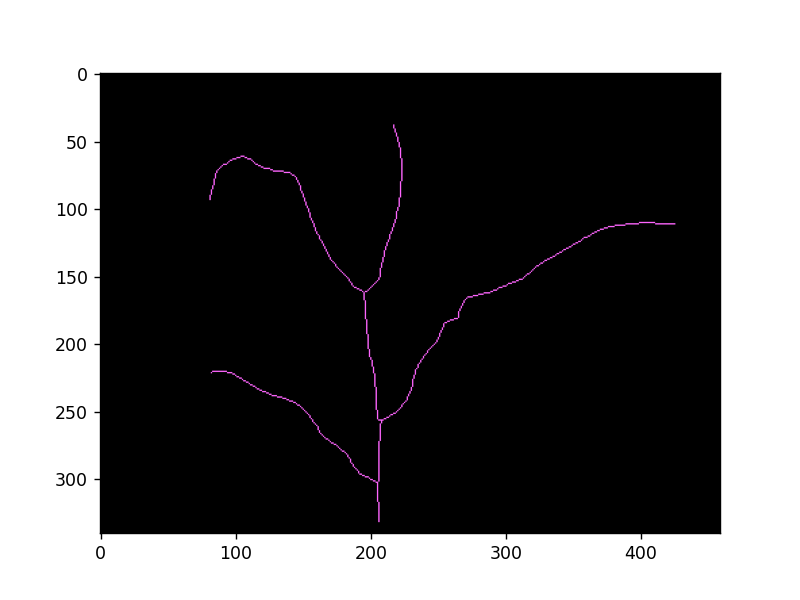

<IPython.core.display.Javascript object>


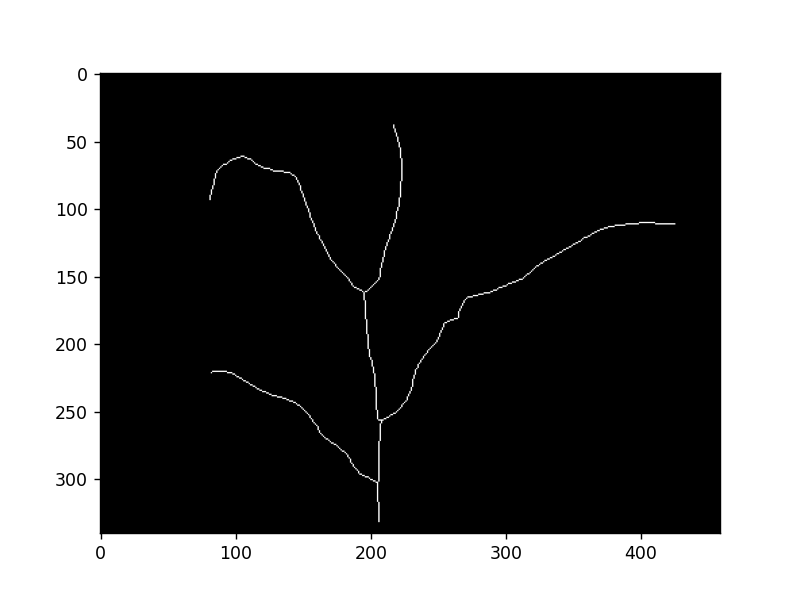

<IPython.core.display.Javascript object>


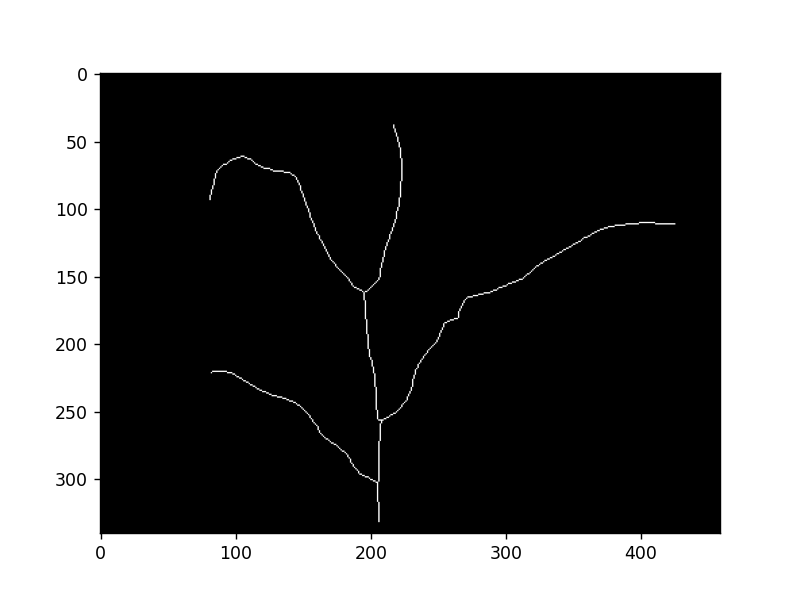

<IPython.core.display.Javascript object>


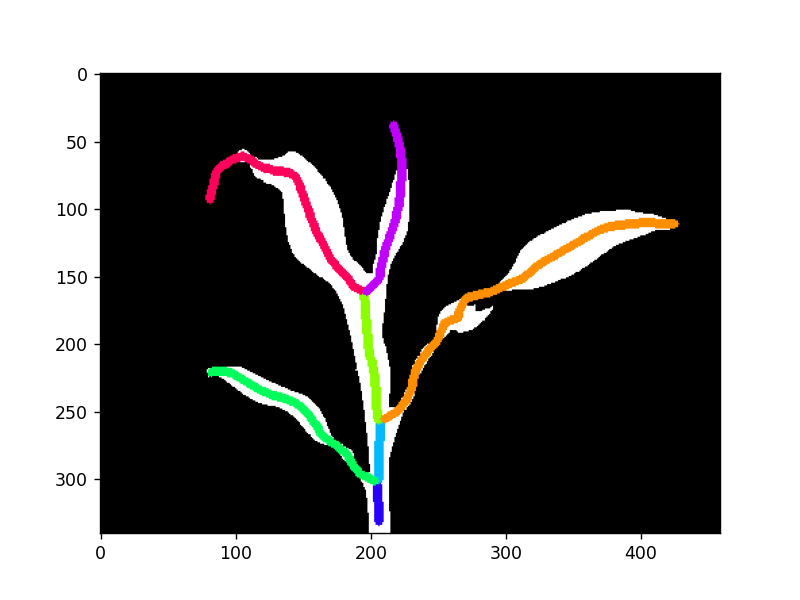

In [23]:
# Prune the skeleton  
# Generally, skeletonized images will have barbs (this image is particularly ideal, 
# that's why it's the example image in the tutorial!), 
# representing the width, that need to get pruned off. 

#permite eliminar los segmentos a cierto tamaño, utilizar la imagen esqueletonizada
# del tamaño, y la mascara anterior

# Inputs:
#   skel_img = Skeletonized image
#   size     = Size to get pruned off each branch
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
img1, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=100, mask=imgerosion)



<IPython.core.display.Javascript object>


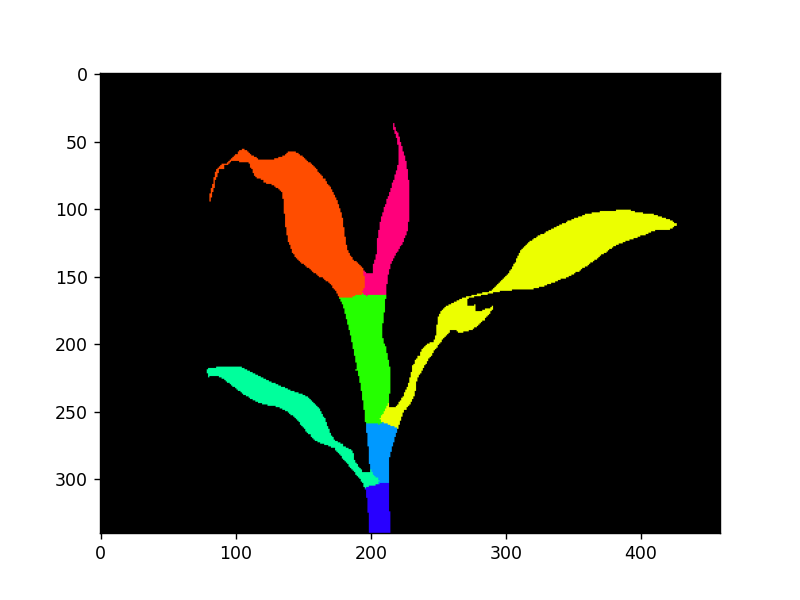

In [24]:
# Fill in segments (also stores out area data)  

# Inputs:
# mask         = Binary image, single channel, object = 1 and background = 0
# objects      = List of contours
# label        = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

filled_img = pcv.morphology.fill_segments(mask=imgerosion, objects=edge_objects)



<IPython.core.display.Javascript object>


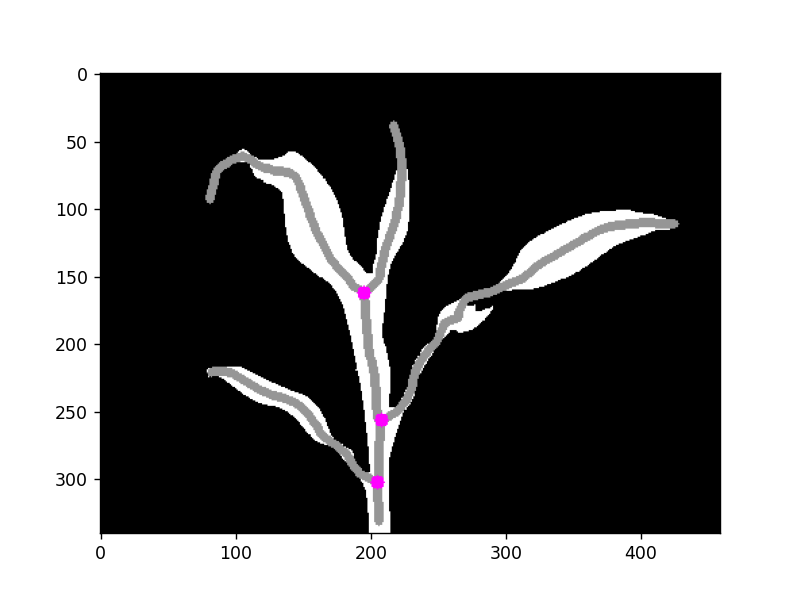

In [25]:
# Identify branch points   

# Inputs:
#   skel_img = Skeletonized image
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
# label      = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=img1, mask=imgerosion)



<IPython.core.display.Javascript object>


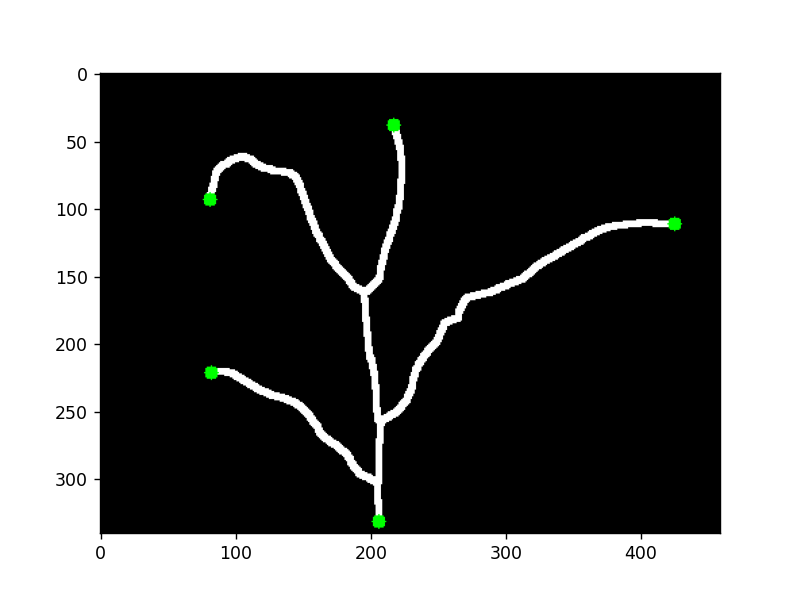

In [26]:
# Identify tip points   

# Inputs:
#   skel_img = Skeletonized image
#   mask     = (Optional) binary mask for debugging. If provided, debug 
#              image will be overlaid on the mask
# label      = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

tip_pts_mask = pcv.morphology.find_tips(skel_img=img1, mask=None)



In [27]:
# Adjust line thickness with the global line thickness parameter (default = 5),
# and provide binary mask of the plant for debugging. NOTE: the objects and
# hierarchies returned will be exactly the same but the debugging image (segmented_img)
# will look different.
pcv.params.line_thickness = 3 



<IPython.core.display.Javascript object>


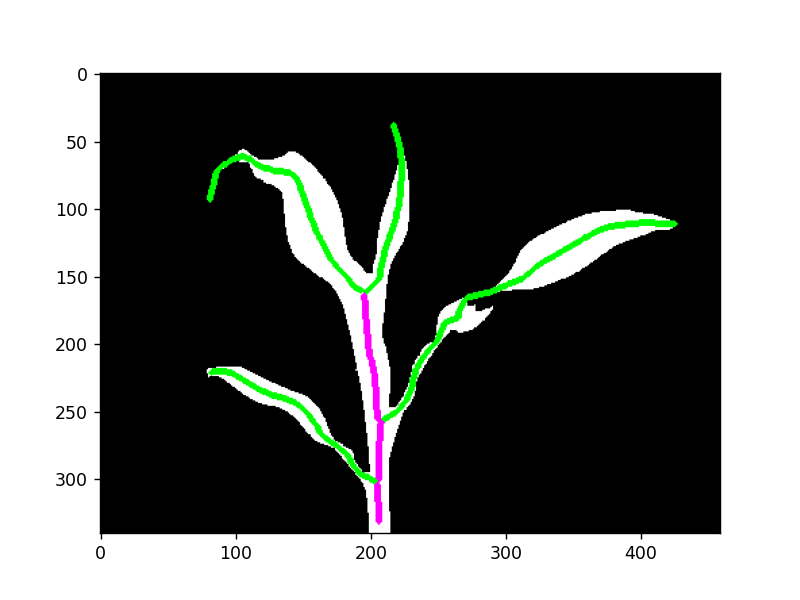

In [28]:
# Sort segments into primary (stem) objects and secondary (leaf) objects. 
# Downstream steps can be performed on just one class of objects at a time, 
# or all objects (output from segment_skeleton) 
  
# Inputs:
#   skel_img  = Skeletonized image
#   objects   = List of contours
#   mask      = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
leaf_obj, stem_obj = pcv.morphology.segment_sort(skel_img=img1, 
                                                 objects=edge_objects,
                                                 mask=imgerosion)



<IPython.core.display.Javascript object>


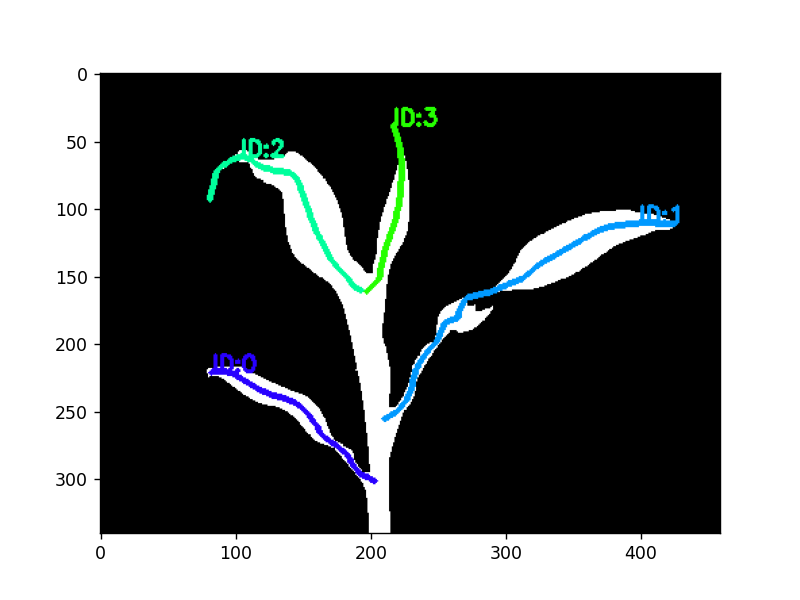

In [29]:
# Identify segments     

# Inputs:
#   skel_img  = Skeletonized image
#   objects   = List of contours
#   mask      = (Optional) binary mask for debugging. If provided, 
#               debug image will be overlaid on the mask.
segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=img1,
                                                       objects=leaf_obj,
                                                       mask=imgerosion)



<IPython.core.display.Javascript object>


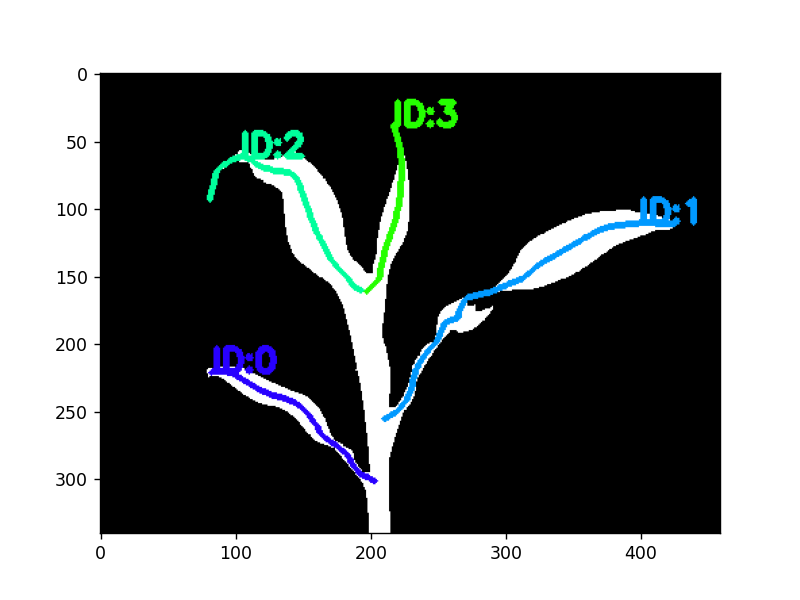

In [30]:
# Similar to line thickness, there are optional text size and text thickness parameters 
# that can be adjusted to better suit images or varying sizes.
pcv.params.text_size=.8 # (default text_size=.55)
pcv.params.text_thickness=3 # (defaul text_thickness=2) 

segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=img1,
                                                       objects=leaf_obj,
                                                       mask=imgerosion)



<IPython.core.display.Javascript object>


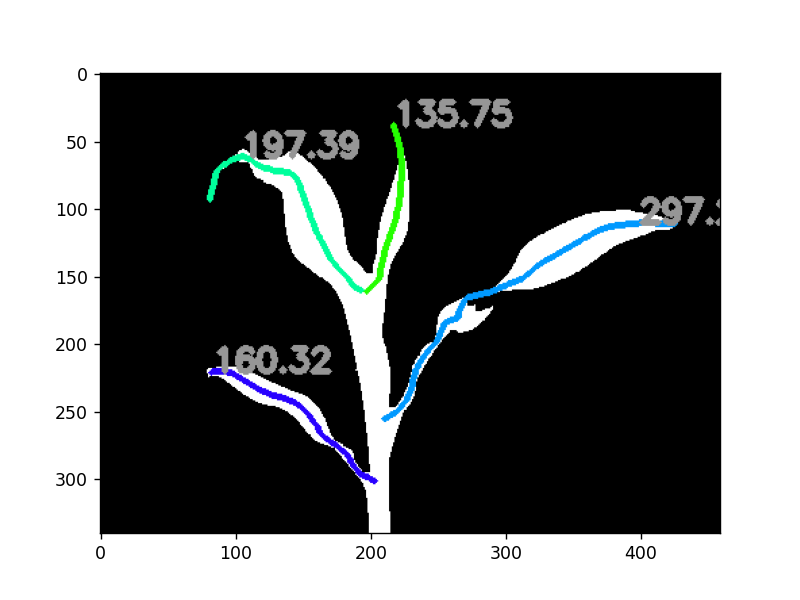

In [31]:
# Measure path lengths of segments     

# Inputs:
#   segmented_img = Segmented image to plot lengths on
#   objects       = List of contours
# label           = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

labeled_img  = pcv.morphology.segment_path_length(segmented_img=segmented_img, 
                                                  objects=leaf_obj)



<IPython.core.display.Javascript object>


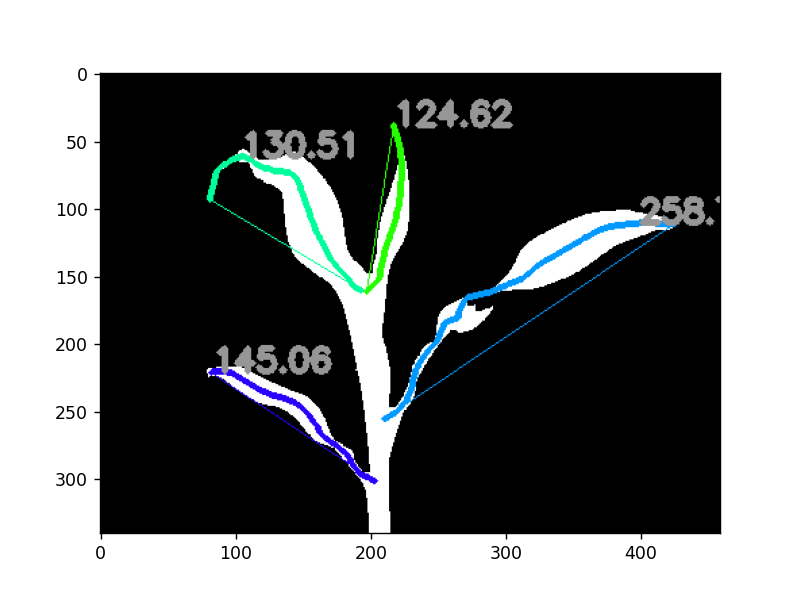

In [32]:
# Measure euclidean distance of segments      
# seria como la hipotenusa
# Inputs:
#   segmented_img = Segmented image to plot lengths on
#   objects       = List of contours
#   label         = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

labeled_img = pcv.morphology.segment_euclidean_length(segmented_img=segmented_img, 
                                                      objects=leaf_obj)



<IPython.core.display.Javascript object>


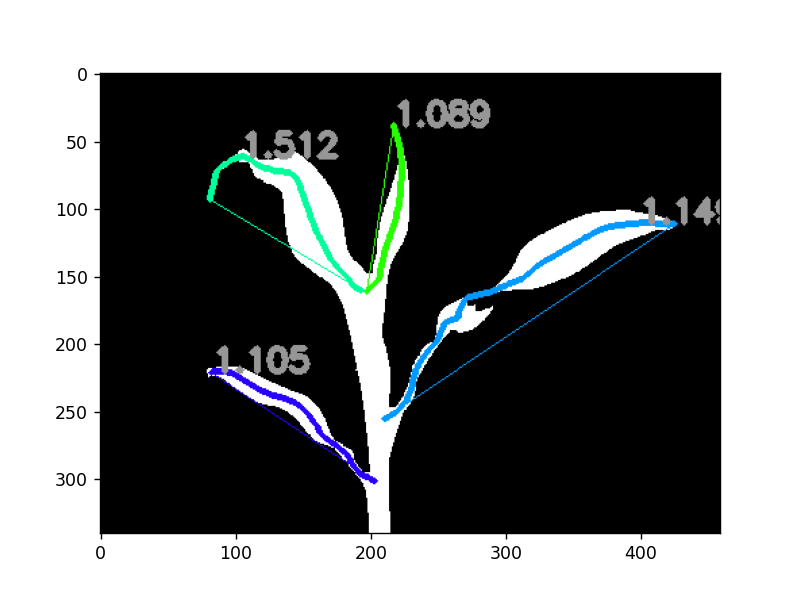

In [33]:
# Measure curvature of segments      

# Inputs:
#   segmented_img = Segmented image to plot curvature on
#   objects       = List of contours
#   label         = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

labeled_img = pcv.morphology.segment_curvature(segmented_img=segmented_img, 
                                               objects=leaf_obj)



<IPython.core.display.Javascript object>


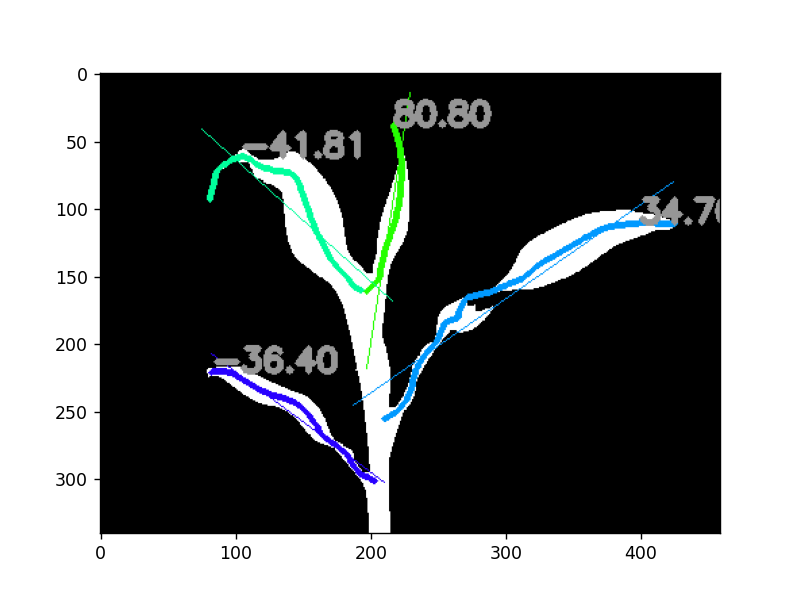

In [34]:
# Measure the angle of segments      

# Inputs:
#   segmented_img = Segmented image to plot angles on
#   objects       = List of contours
#   label         = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

labeled_img = pcv.morphology.segment_angle(segmented_img=segmented_img, 
                                           objects=leaf_obj)



<IPython.core.display.Javascript object>


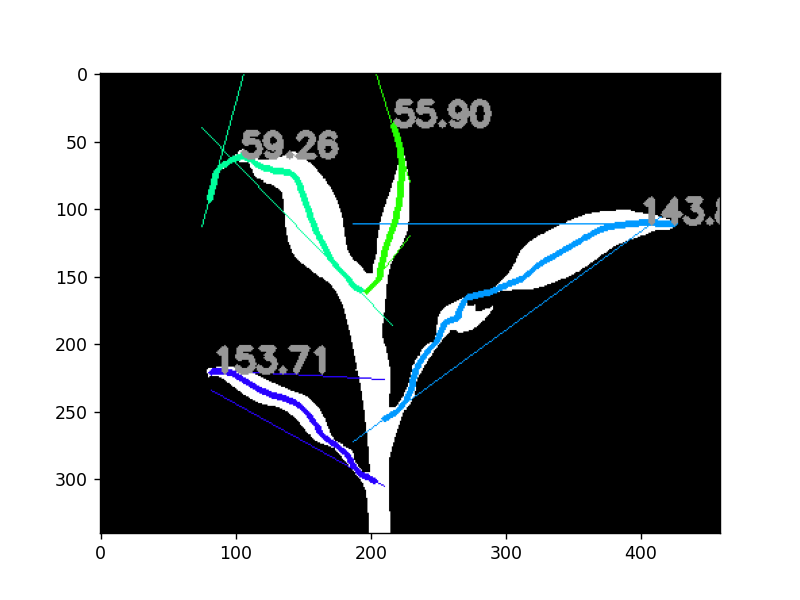

In [35]:
# Measure the tangent angles of segments      

# Inputs:
#   segmented_img = Segmented image to plot tangent angles on
#   objects       = List of contours
#   size          = Size of ends used to calculate "tangent" lines
#   label         = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

labeled_img = pcv.morphology.segment_tangent_angle(segmented_img=segmented_img, 
                                                   objects=leaf_obj, size=15)

#tangente de 0 encontramos una hoja horizontal

C:\Users\semex_7vulq7b\Documents\progpython\lib\site-packages\plantcv\plantcv\closing.py:26: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.


<IPython.core.display.Javascript object>


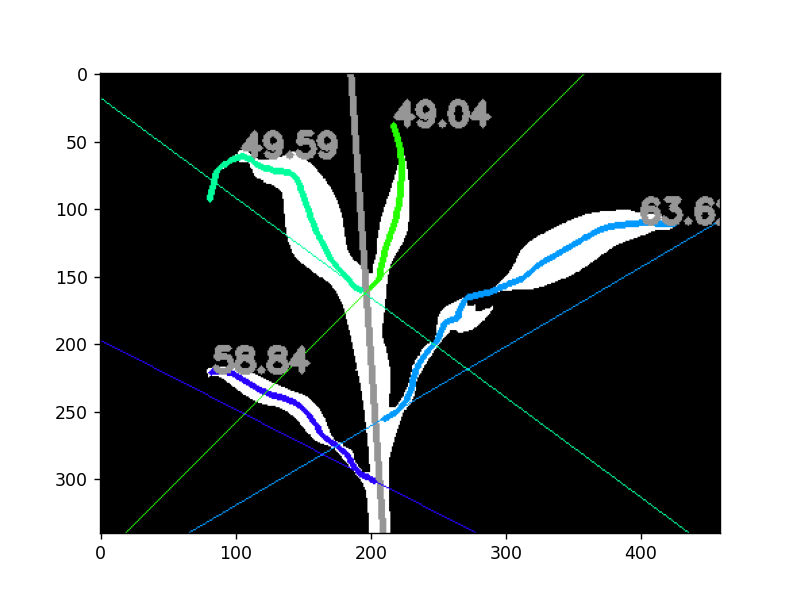

In [36]:
# Measure the leaf insertion angles      

# Inputs:
#   skel_img         = Skeletonize image 
#   segmented_img    = Segmented image to plot insertion angles on
#   leaf_objects     = List of leaf contours
#   stem_objects     = List of stem objects 
#   size             = Size of the inner portion of each leaf to find a linear regression line
#   label            = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

labeled_img = pcv.morphology.segment_insertion_angle(skel_img=img1,
                                                     segmented_img=segmented_img, 
                                                     leaf_objects=leaf_obj, 
                                                     stem_objects=stem_obj,
                                                     size=10)



In [40]:
# Write morphological data to results file

# The print_results function will take the measurements stored when running any (or all) of these functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 
#pcv.print_results(filename=args.result)
pcv.outputs.save_results(filename=args.result, outformat='csv')



In [38]:
    #Se usa la función 'read_json' para leer el archivo json y guardarlo como csv
    #De esta forma se puede abrir en excel
df = pd.read_json (r'./' + args.result)
df.to_csv (r'./' + 'resulted-multiclass' +  '.csv', index = None,header=True)

    #Con este procedimiento se convierte un archivo 'json' en archivo 'csv'
    #En excel, en la pestaña de datos, seleccionar obtener datos externos, y seleccionar
    #la opción desde texto. Ahi seleccionar el archivo *.csv para importar a excel. Seleccionar
    # la opción delimitados, siguiente, y seleccionar la opción delimitadores: coma
    # y seleccionar finalizar.

    #Después seleccionar las celdas con el texto, y en la pestaña datos, seleccionar
    # texto en columnas, seleccionar delimitados, seleccionar delimitadores 'coma' y 
    # y en 'otro' escribir ':'. Después seleccionar siguiente, y finalizar.


